In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer

# house data set assigned to pandas data frame
house_df = pd.read_csv("https://raw.githubusercontent.com/markkalaiji/HousePrices/main/train.csv")

# feature matrix and label vector
X = house_df[['MSSubClass','MSZoning','Utilities','BldgType','HouseStyle','OverallQual','OverallCond','YearBuilt','RoofStyle','RoofMatl','ExterQual','ExterCond','Foundation','BsmtCond','TotalBsmtSF','Heating','HeatingQC','CentralAir','Electrical','KitchenQual','Functional','FireplaceQu','GarageQual']]
y = house_df['SalePrice']

imputer = SimpleImputer(strategy='constant',fill_value='NA')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

MSZoning_Dummies = pd.get_dummies(house_df.MSZoning)
Utilities_Dummies = pd.get_dummies(house_df.Utilities)
BldgType_Dummies = pd.get_dummies(house_df.BldgType)
HouseStyle_Dummies = pd.get_dummies(house_df.HouseStyle)
ExterQual_Dummies = pd.get_dummies(house_df.ExterQual)
ExterCond_Dummies = pd.get_dummies(house_df.ExterCond)
RoofStyle_Dummies = pd.get_dummies(house_df.RoofStyle)
RoofMatl_Dummies = pd.get_dummies(house_df.RoofMatl)
Foundation_Dummies = pd.get_dummies(house_df.Foundation)
BsmtCond_Dummies = pd.get_dummies(house_df.BsmtCond)
Heating_Dummies = pd.get_dummies(house_df.Heating)
HeatingQC_Dummies = pd.get_dummies(house_df.HeatingQC)
CentralAir_Dummies = pd.get_dummies(house_df.CentralAir)
Electrical_Dummies = pd.get_dummies(house_df.Electrical)
KitchenQual_Dummies = pd.get_dummies(house_df.KitchenQual)
Functional_Dummies = pd.get_dummies(house_df.Functional)
FireplaceQu_Dummies = pd.get_dummies(house_df.FireplaceQu)
GarageQual_Dummies = pd.get_dummies(house_df.GarageQual)

X = pd.concat([X,MSZoning_Dummies,Utilities_Dummies,BldgType_Dummies,HouseStyle_Dummies,RoofStyle_Dummies,RoofMatl_Dummies,ExterQual_Dummies,ExterCond_Dummies,Foundation_Dummies,BsmtCond_Dummies,Heating_Dummies,HeatingQC_Dummies,CentralAir_Dummies,Electrical_Dummies,KitchenQual_Dummies,Functional_Dummies,FireplaceQu_Dummies,GarageQual_Dummies], axis='columns')
X = X.drop(['MSZoning','Utilities','BldgType','HouseStyle','RoofStyle','RoofMatl','ExterQual','ExterCond','Foundation','BsmtCond','Heating','HeatingQC','CentralAir','Electrical','KitchenQual','Functional','FireplaceQu','GarageQual'],axis='columns')

X

,MSSubClass,OverallQual,OverallCond,YearBuilt,TotalBsmtSF,C (all),FV,RH,RL,RM,...,Ex,Fa,Gd,Po,TA,Ex,Fa,Gd,Po,TA
0,60,7,5,2003,856,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,20,6,8,1976,1262,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
2,60,7,5,2001,920,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
3,70,7,5,1915,756,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
4,60,8,5,2000,1145,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,6,5,1999,953,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
1456,20,6,6,1978,1542,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
1457,70,7,9,1941,1152,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
1458,20,5,6,1950,1078,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [2]:
# scale data
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()

X = pd.DataFrame(mms.fit_transform(X), columns=X.columns)

# split data set into testing and training
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.24, random_state=0)

In [3]:
# import KNN
from sklearn import neighbors as knn

# KNN Regressor object with K = 3
knn_reg = knn.KNeighborsRegressor(n_neighbors = 3)

# training on training set
knn_reg.fit(X_train, y_train)

# test on testing set
y_predict_knn_reg = knn_reg.predict(X_test)

In [4]:
# calculating RMSE
from sklearn import metrics

mse = metrics.mean_squared_error(y_test, y_predict_knn_reg)
rmse = np.sqrt(mse)

print(rmse)

43915.77149217317


In [5]:
from sklearn.model_selection import cross_val_score

# 10-fold cross validation
mse_list = cross_val_score(knn_reg, X, y, cv=10, scoring='neg_mean_squared_error')

# changing negative values to positive
positive_mse_list = -mse_list

# calculating RMSE
rmse_list = np.sqrt(positive_mse_list)

# calculate average of RMSE as final result of cross validation
print(rmse_list.mean())

44929.03244219007


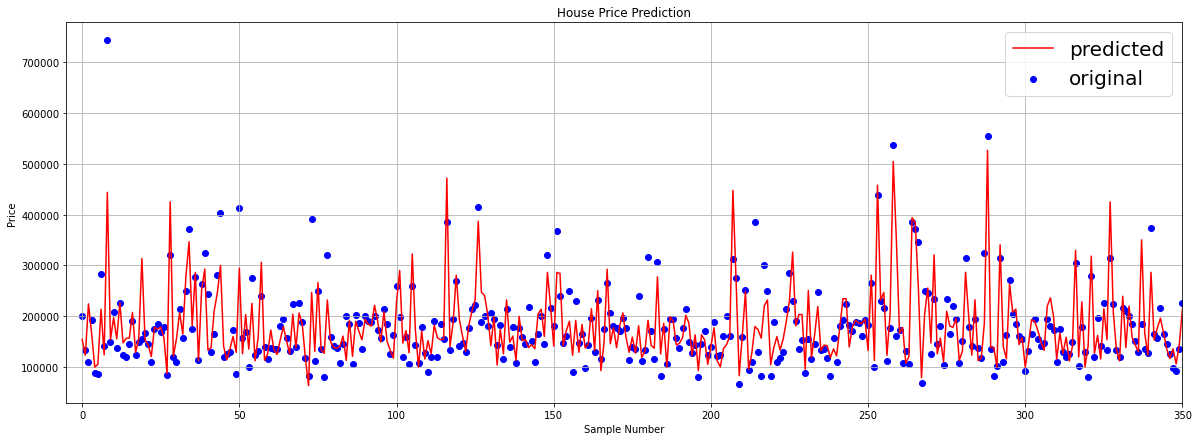

In [7]:
# visualize results
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

x_index = list(range(len(y_test)))

plt.figure(figsize=(20,7))
plt.scatter(x_index, y_test, color='blue', label='original')
plt.plot(x_index,y_predict_knn_reg,color='red',label='predicted')
plt.legend(prop={'size': 20})
plt.title('House Price Prediction')
plt.xlabel('Sample Number')
plt.ylabel('Price')

plt.xlim(-5, 350)
plt.grid()